In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import root_mean_squared_log_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../cleaned_dataset_without_na.csv', delimiter='|')
data.head()

,title,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,type_of_building,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,district,city,latitude,longtitude
0,"Apartament inwestycyjny, ostatnie piętro, k/Sk...",24.89,1.0,4-6,secondary,0,1,2022.0,1.0,Mieszkanie,0.0,16749.98,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846
1,Apartament inwestycyjny Śląska 12 z umową najmu!,25.72,1.0,0,secondary,0,1,2022.0,1.0,Mieszkanie,0.0,18500.00,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846
2,"Nowe mieszkanie, wykończone - Mariana Kołodzieja",34.38,2.0,1-3,secondary,1,1,2022.0,1.0,Mieszkanie,0.0,15997.67,1,0,0,mariana kołodzieja,ujeścisko-łostowice,gdansk,54.334542,18.585750
3,"Wyjątkowe mieszkanie w centrum Gdyni, blisko l...",101.58,4.0,4-6,secondary,0,1,1997.0,1.0,Mieszkanie,0.0,11468.79,0,0,0,janusza korczaka,redłowo,gdynia,54.494118,18.543134
4,Mieszkanie w świetnej lokalizacji Gdynia Dąbrowa,68.00,3.0,1-3,secondary,0,0,2000.0,1.0,Mieszkanie,1.0,10279.41,1,0,0,oliwkowa,dąbrowa,gdynia,54.471180,18.470508


In [3]:
data.describe()

,area,number_of_rooms,parking,elevator,year_of_creation,internet,basement,price_for_m2_in_PLN,balcony,garden,terrace,latitude,longtitude
count,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000
mean,61.512499,2.733008,0.611888,0.532329,2003.080801,0.436212,0.360129,14460.779525,0.588790,0.138174,0.090322,54.390655,18.563264
std,27.520431,0.928739,0.487340,0.498974,30.972408,0.495935,0.480058,6502.241837,0.492073,0.345096,0.286654,0.344514,1.816736
min,1.000000,1.000000,0.000000,0.000000,1836.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,32.828866,-86.789292
25%,44.000000,2.000000,0.000000,0.000000,1989.000000,0.000000,0.000000,10649.860000,0.000000,0.000000,0.000000,54.348854,18.467438
50%,56.000000,3.000000,1.000000,1.000000,2019.000000,0.000000,0.000000,13093.000000,1.000000,0.000000,0.000000,54.424062,18.558077
75%,72.000000,3.000000,1.000000,1.000000,2024.000000,1.000000,1.000000,17558.540000,1.000000,0.000000,0.000000,54.471546,18.607162
max,205.000000,5.000000,1.000000,1.000000,2028.000000,1.000000,1.000000,57988.170000,1.000000,1.000000,1.000000,62.097038,126.699790


In [4]:
data = data.drop('title', axis=1)

In [5]:
threshold_low = 5000  # Set your threshold value here
threshold_high = 30000
data = data[data['price_for_m2_in_PLN'] >= threshold_low]
data = data[data['price_for_m2_in_PLN'] <= threshold_high]
data.count()

area                   11174
number_of_rooms        11174
floor                  11174
type_of_market         11174
parking                11174
elevator               11174
year_of_creation       11174
internet               11174
type_of_building       11174
basement               11174
price_for_m2_in_PLN    11174
balcony                11174
garden                 11174
terrace                11174
street                 10204
district               11174
city                   11174
latitude               11174
longtitude             11174
dtype: int64

In [6]:
data[data['price_for_m2_in_PLN'] > 30000].count()

area                   0
number_of_rooms        0
floor                  0
type_of_market         0
parking                0
elevator               0
year_of_creation       0
internet               0
type_of_building       0
basement               0
price_for_m2_in_PLN    0
balcony                0
garden                 0
terrace                0
street                 0
district               0
city                   0
latitude               0
longtitude             0
dtype: int64

In [7]:

data['year_of_creation'].dtype

dtype('float64')

In [8]:
data[data['price_for_m2_in_PLN'] < 5000]

,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,type_of_building,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,district,city,latitude,longtitude


In [9]:
crimes_per_city = {
    'gdynia': 144,
    'sopot': 110,
    'gdansk': 71
}

In [10]:
data['crimes_per_city'] = data['city'].map(crimes_per_city)
data.head()

,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,type_of_building,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,district,city,latitude,longtitude,crimes_per_city
0,24.89,1.0,4-6,secondary,0,1,2022.0,1.0,Mieszkanie,0.0,16749.98,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846,71
1,25.72,1.0,0,secondary,0,1,2022.0,1.0,Mieszkanie,0.0,18500.00,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846,71
2,34.38,2.0,1-3,secondary,1,1,2022.0,1.0,Mieszkanie,0.0,15997.67,1,0,0,mariana kołodzieja,ujeścisko-łostowice,gdansk,54.334542,18.585750,71
3,101.58,4.0,4-6,secondary,0,1,1997.0,1.0,Mieszkanie,0.0,11468.79,0,0,0,janusza korczaka,redłowo,gdynia,54.494118,18.543134,144
4,68.00,3.0,1-3,secondary,0,0,2000.0,1.0,Mieszkanie,1.0,10279.41,1,0,0,oliwkowa,dąbrowa,gdynia,54.471180,18.470508,144


In [11]:
#data = data.where(data['city'] == 'gdansk').dropna()

In [12]:
#data.head().dropna()

In [13]:
data_numerical = data.drop(['city', 'district', 'type_of_market', 'type_of_building', 'floor', 'street'], axis=1)

<Axes: >

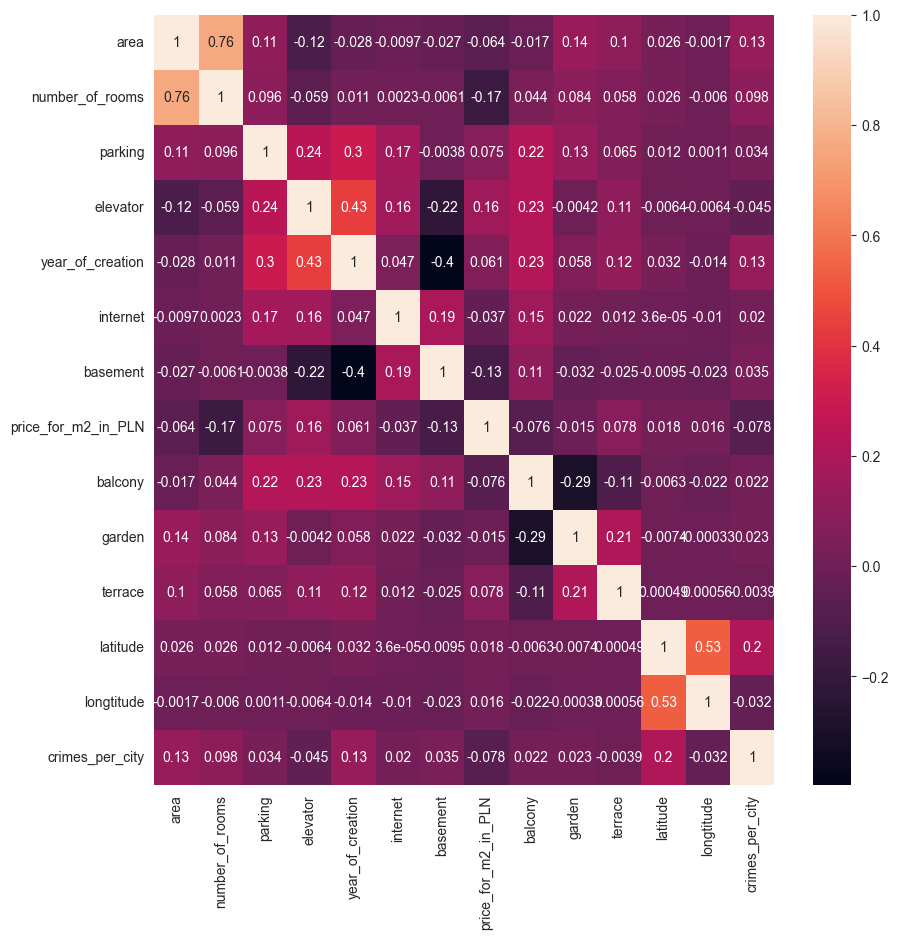

In [14]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data_numerical.corr(), annot=True, ax=ax)

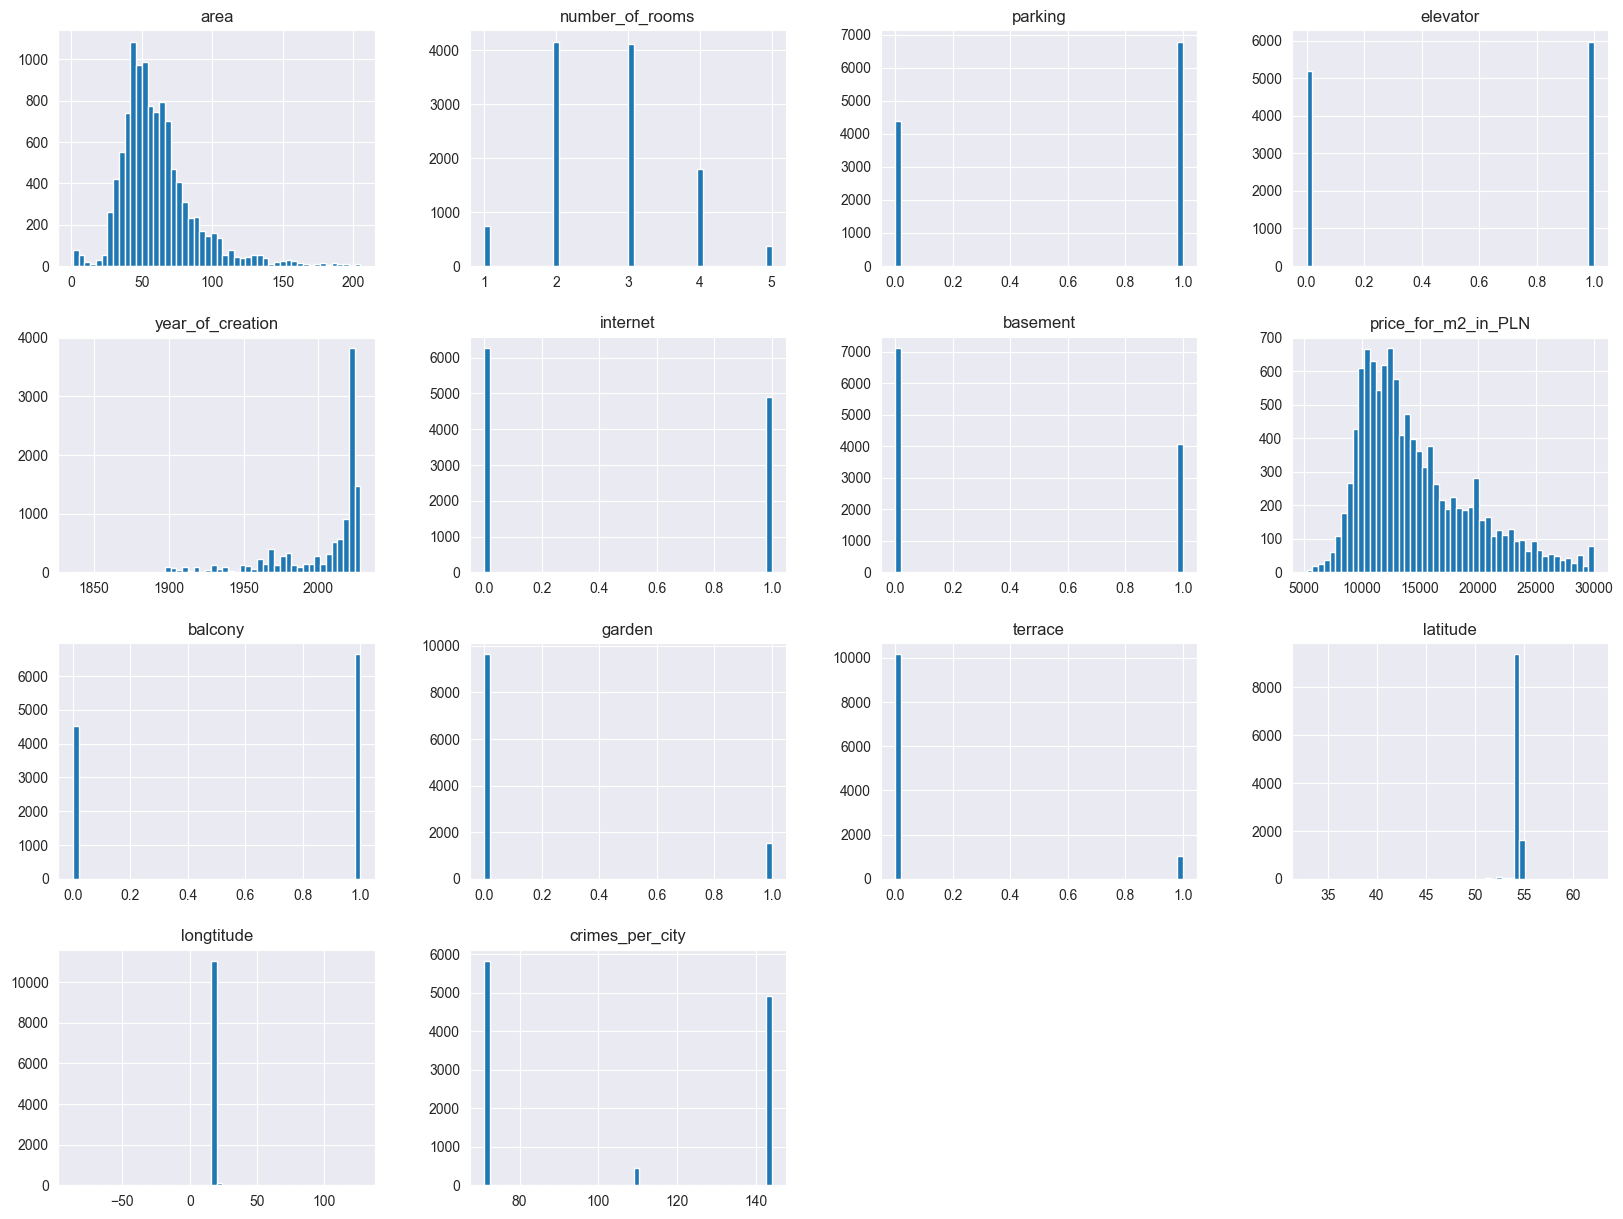

In [15]:
# histogram
data_numerical.hist(bins=50, figsize=(20,15))
plt.show()

In [16]:
from matplotlib import pylab
from scipy import stats


def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)

    plt.show()
    

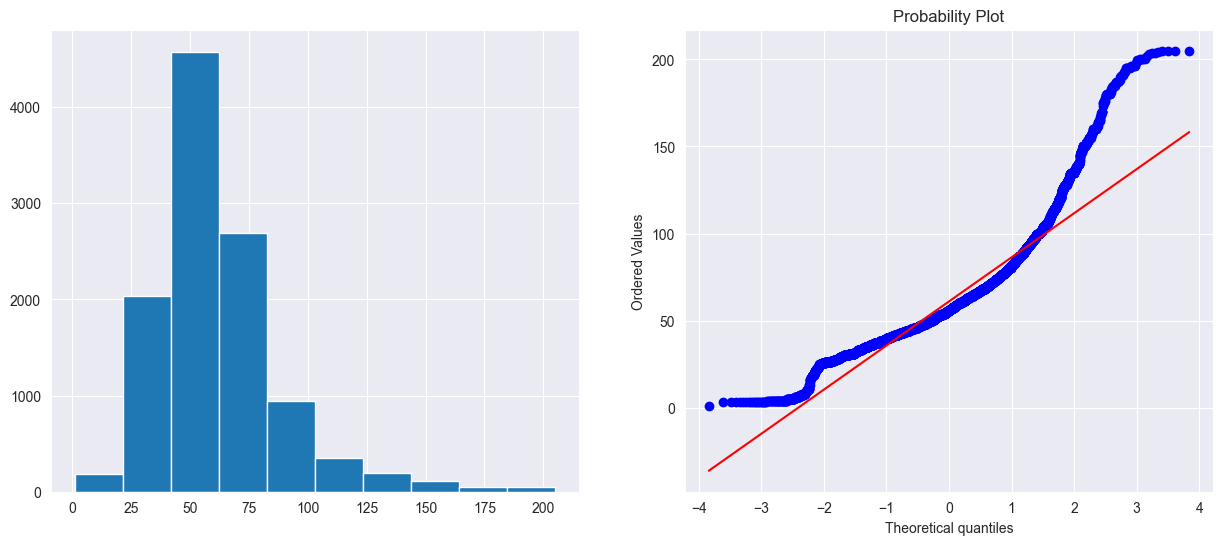

In [17]:
diagnostic_plots(data, 'area')

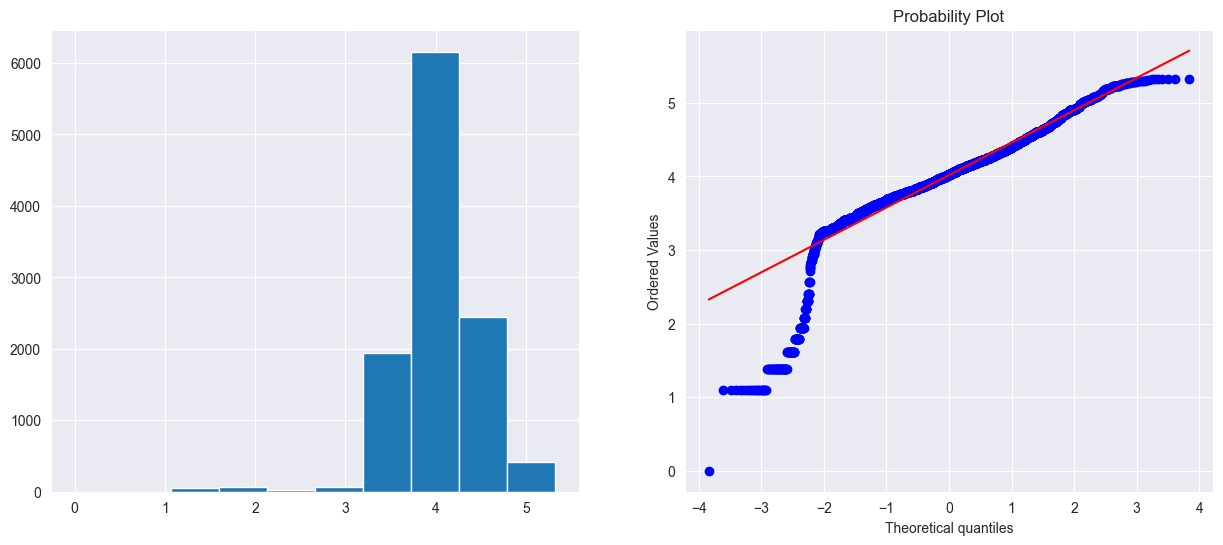

In [18]:
data_numerical['area'] = np.log(data['area'])
diagnostic_plots(data_numerical, 'area')

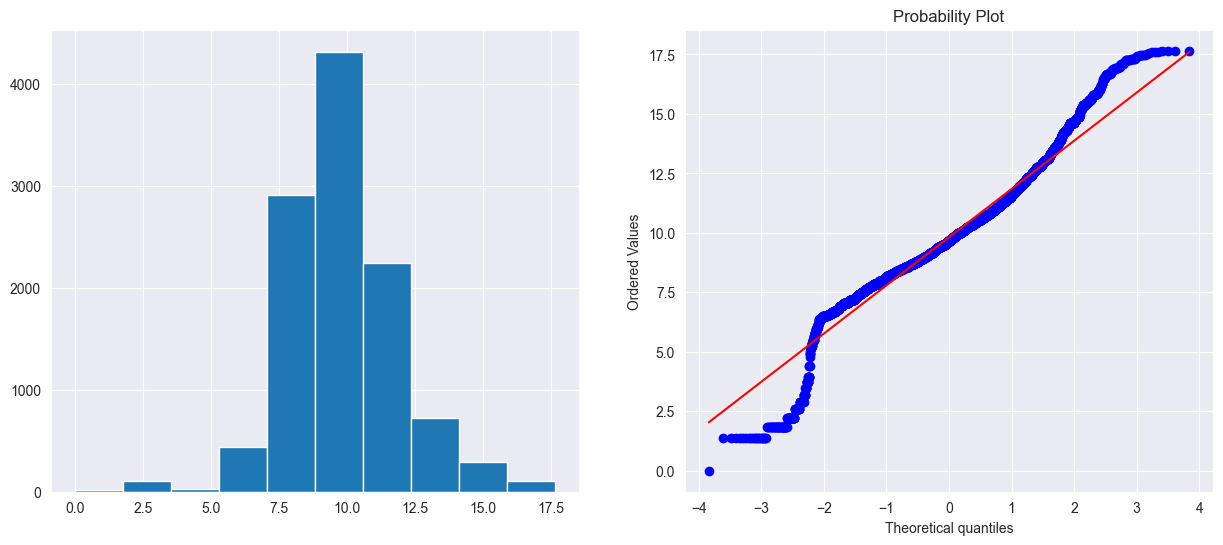

In [19]:
data_numerical['area'], param = stats.boxcox(data['area']) # you can vary the exponent as needed
diagnostic_plots(data_numerical, 'area')

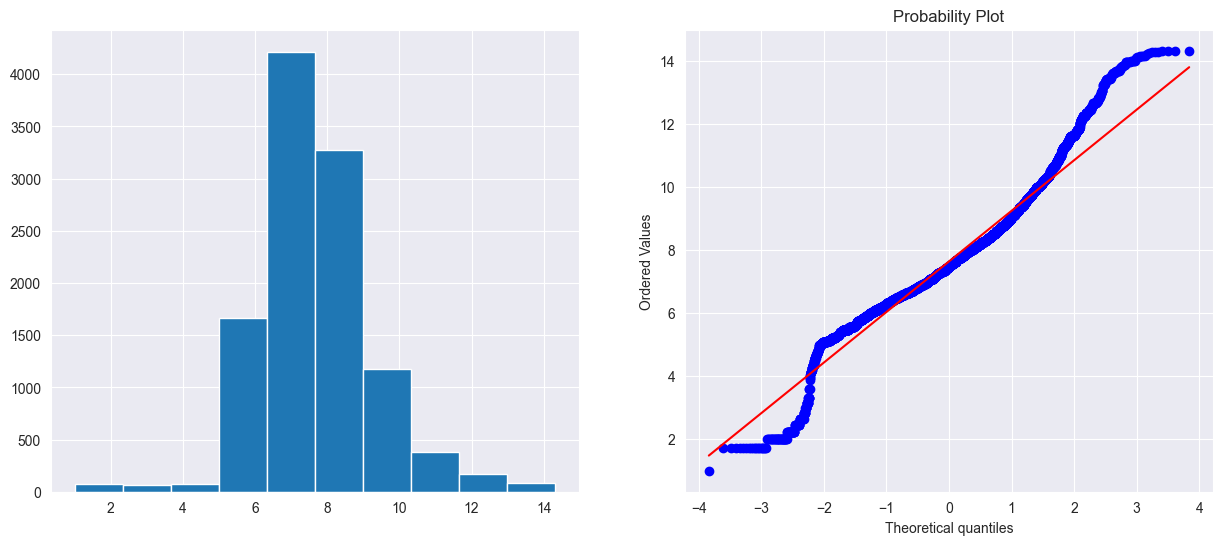

In [20]:
data_numerical['area'] = np.sqrt(data['area']) # you can vary the exponent as needed
diagnostic_plots(data_numerical, 'area')

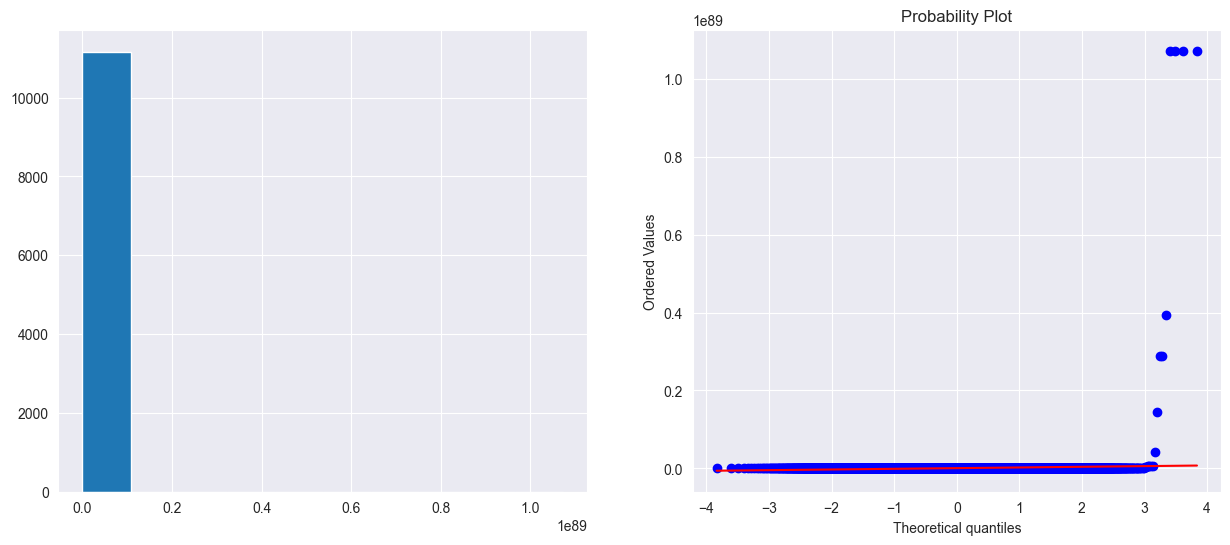

In [21]:
data_numerical['area'] = np.exp(data['area']) # you can vary the exponent as needed
diagnostic_plots(data_numerical, 'area')

In [22]:
A = data.drop(['price_for_m2_in_PLN', 'street'], axis=1)
b = data['price_for_m2_in_PLN']

In [23]:
#A = np.column_stack([np.ones(A.shape[0]), A])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(A, b, test_size=0.2, random_state=0)

In [25]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8939, 18) (2235, 18) (8939,) (2235,)


In [26]:
A['floor'].dtype

dtype('O')

> DEBIL MOMENT

In [27]:
#encoder_one_hot = OneHotEncoder()
#X_train_one_hot = encoder_one_hot.fit_transform(X_train[['floor', 'type_of_market', 'type_of_building', 'district']])

In [28]:
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

In [29]:
preprocessor = ColumnTransformer([("cat", cat_pipeline, make_column_selector(dtype_include=object)),], remainder=num_pipeline)

In [30]:
preprocessor = preprocessor.fit(X_train, y_train)

In [31]:
preprocessor.get_feature_names_out()

array(['cat__floor_0', 'cat__floor_1-3', 'cat__floor_4-6',
       'cat__floor_8+', 'cat__type_of_market_primary',
       'cat__type_of_market_secondary', 'cat__type_of_building_Dom',
       'cat__type_of_building_Mieszkanie', 'cat__district_aniołki',
       'cat__district_babie doły', 'cat__district_brodwino',
       'cat__district_brzeźno', 'cat__district_brętowo',
       'cat__district_chełm', 'cat__district_chwarzno-wiczlino',
       'cat__district_chylonia', 'cat__district_cisowa',
       'cat__district_dolny sopot', 'cat__district_działki leśne',
       'cat__district_dąbrowa', 'cat__district_grabówek',
       'cat__district_górny sopot', 'cat__district_jasień',
       'cat__district_kamienna góra', 'cat__district_kamienny potok',
       'cat__district_karlikowo', 'cat__district_karwiny',
       'cat__district_kokoszki', 'cat__district_leszczynki',
       'cat__district_letnica', 'cat__district_matarnia',
       'cat__district_mały kack', 'cat__district_młyniska',
       'cat__dis

In [32]:
X_train_preprocessed = preprocessor.transform(X_train)

In [33]:
model = LinearRegression()

In [34]:
model.fit(X_train_preprocessed, y_train)

LinearRegression()

In [35]:
X_test_preprocessed = preprocessor.transform(X_test)

In [36]:
y_pred = model.predict(X_test_preprocessed)

In [37]:
mse = mean_squared_error(y_test, y_pred)
print(f"One-Hot Encoding Model - Mean Squared Error: {mse}")

One-Hot Encoding Model - Mean Squared Error: 11555187.379540235


In [38]:
rmse = root_mean_squared_error(y_test, y_pred)
print("RMSE: ", rmse)

RMSE:  3399.2921880209465


In [39]:
rmsle = root_mean_squared_log_error(y_test, y_pred)
rmsle

np.float64(0.22269978895460515)

In [40]:
for i in range(20):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test.iloc[i]}")

Predicted: 15931.805121937663, Actual: 14894.51
Predicted: 17958.357715988852, Actual: 10898.9
Predicted: 12812.92123279034, Actual: 10167.64
Predicted: 15181.289404108262, Actual: 8673.0
Predicted: 12603.164291915524, Actual: 10046.0
Predicted: 12192.634675698762, Actual: 12981.35
Predicted: 12712.47472350104, Actual: 15600.0
Predicted: 9548.98047680537, Actual: 10648.15
Predicted: 13782.529127055423, Actual: 24900.0
Predicted: 11939.2815901387, Actual: 27197.0
Predicted: 12210.706770080826, Actual: 12342.11
Predicted: 10034.682490634874, Actual: 9222.22
Predicted: 14160.724958941453, Actual: 8700.0
Predicted: 13168.03243918029, Actual: 11926.0
Predicted: 10980.436369154435, Actual: 12300.68
Predicted: 22431.06995212676, Actual: 23395.0
Predicted: 12182.73710477939, Actual: 11321.4
Predicted: 12929.21584714064, Actual: 14500.0
Predicted: 10835.169022940743, Actual: 11980.0
Predicted: 13332.944460576007, Actual: 13827.0


In [41]:
print(X_test_preprocessed.shape, y_test.shape, y_pred.shape)

(2235, 84) (2235,) (2235,)


In [42]:
coefficients = model.coef_
feature_names = preprocessor.get_feature_names_out()
d = {feature_names[i]: coefficients[i] for i in range(len(feature_names))}
d

{'cat__floor_0': np.float64(-360.4639128514684),
 'cat__floor_1-3': np.float64(-361.72439170652353),
 'cat__floor_4-6': np.float64(-562.6116127591324),
 'cat__floor_8+': np.float64(1284.7999173120177),
 'cat__type_of_market_primary': np.float64(-886.7068314224431),
 'cat__type_of_market_secondary': np.float64(886.7068314231458),
 'cat__type_of_building_Dom': np.float64(-1175.593288501151),
 'cat__type_of_building_Mieszkanie': np.float64(1175.5932885005207),
 'cat__district_aniołki': np.float64(3093.871192563652),
 'cat__district_babie doły': np.float64(-3019.0154822711943),
 'cat__district_brodwino': np.float64(-3858.1640971524716),
 'cat__district_brzeźno': np.float64(4273.667376513283),
 'cat__district_brętowo': np.float64(-446.98760345036504),
 'cat__district_chełm': np.float64(-1808.9776582023553),
 'cat__district_chwarzno-wiczlino': np.float64(-4158.6572745991925),
 'cat__district_chylonia': np.float64(-2444.3104533165933),
 'cat__district_cisowa': np.float64(-3486.6095051109364),

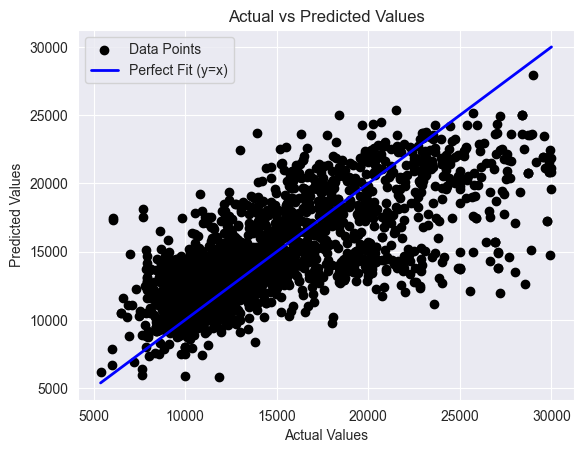

In [43]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color="black", label="Data Points")

# Plot a reference line (y = x) to show perfect predictions
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="blue", linewidth=2, label="Perfect Fit (y=x)")

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Display legend
plt.legend()

# Show the plot
plt.show()

> Decision Trees

In [44]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor()
DT_model.fit(X_train_preprocessed, y_train)

DecisionTreeRegressor()

In [45]:
y_pred_DT = DT_model.predict(X_test_preprocessed)

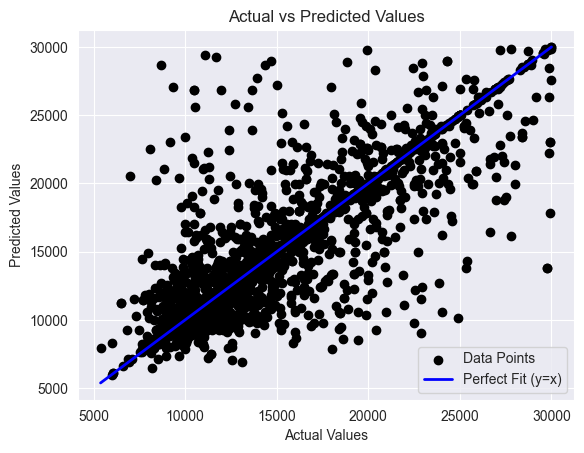

In [46]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_DT, color="black", label="Data Points")

# Plot a reference line (y = x) to show perfect predictions
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="blue", linewidth=2, label="Perfect Fit (y=x)")

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [47]:
rmse_DT = root_mean_squared_error(y_test, y_pred_DT)
print("RMSE: ", rmse_DT)

RMSE:  3003.6427177985106


> Random forest

In [48]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(max_depth=20, min_samples_split=10)
RF_model.fit(X_train_preprocessed, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=10)

In [49]:
y_pred_RF = RF_model.predict(X_test_preprocessed)

In [50]:
from sklearn.model_selection import cross_val_score

#rf_scores = cross_val_score(RF_model, X_train_preprocessed, y_train, scoring='root_mean_squared_error')

In [51]:
#max(rf_scores)

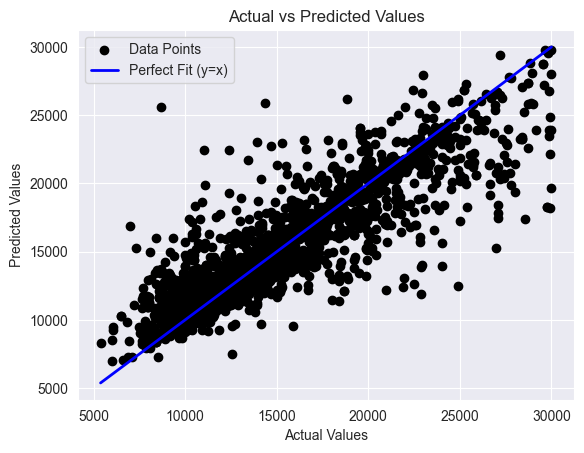

In [52]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_RF, color="black", label="Data Points")

# Plot a reference line (y = x) to show perfect predictions
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="blue", linewidth=2, label="Perfect Fit (y=x)")

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [53]:
rmse_RF = root_mean_squared_error(y_test, y_pred_RF)
print("RMSE: ", rmse_RF)

RMSE:  2350.7710369404776


In [54]:
rmlse_RF = root_mean_squared_log_error(y_test, y_pred_RF)
rmlse_RF

np.float64(0.15360514970889116)

In [55]:
RF_model.score(X_test_preprocessed, y_test)

0.771742884885906

KNR

In [56]:
from sklearn.neighbors import KNeighborsRegressor

knr_model = KNeighborsRegressor(n_neighbors=20)

knr_model.fit(X_train_preprocessed, y_train)

KNeighborsRegressor(n_neighbors=20)

In [57]:
y_pred_knr = knr_model.predict(X_test_preprocessed)

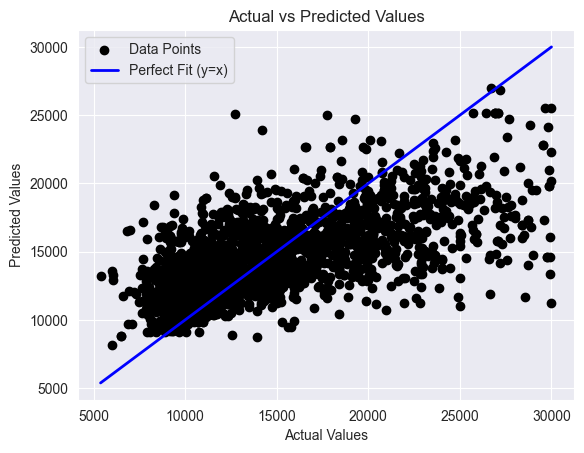

In [58]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_knr, color="black", label="Data Points")

# Plot a reference line (y = x) to show perfect predictions
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="blue", linewidth=2, label="Perfect Fit (y=x)")

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [59]:
rmse_knr = root_mean_squared_error(y_test, y_pred_knr)
rmse_knr

np.float64(3801.711498884805)

Gradient boosting

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

model_GB = GradientBoostingRegressor()
model_GB.fit(X_train_preprocessed, y_train)

GradientBoostingRegressor()

In [61]:
y_pred_GB = model_GB.predict(X_test_preprocessed)

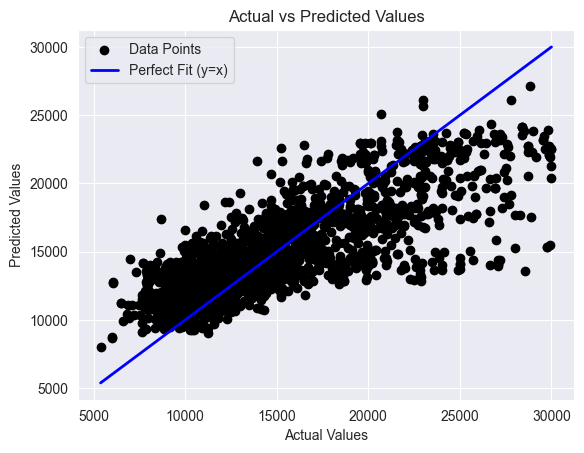

In [62]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_GB, color="black", label="Data Points")

# Plot a reference line (y = x) to show perfect predictions
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="blue", linewidth=2, label="Perfect Fit (y=x)")

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [63]:
rmse_GB = root_mean_squared_error(y_test, y_pred_GB)
rmse_GB

np.float64(3081.9206567198203)

In [64]:
#param_grid = {
#    'max_depth': [7, 10, 15],
#    'min_samples_split': [2, 5, 10],
#    'learning_rate': [0.1, 0.5, 1],
#    'criterion': ['friedman_mse', 'squared_error'],
#    
#}
#model_GB = GradientBoostingRegressor()

In [65]:
#from sklearn.model_selection import GridSearchCV
#grid_search = GridSearchCV(model_GB, param_grid, cv=3)
#grid_search.fit(X_train_preprocessed, y_train)

In [66]:
#print("Best parameters: ", grid_search.best_params_)
#print("Best score: ", grid_search.best_score_)

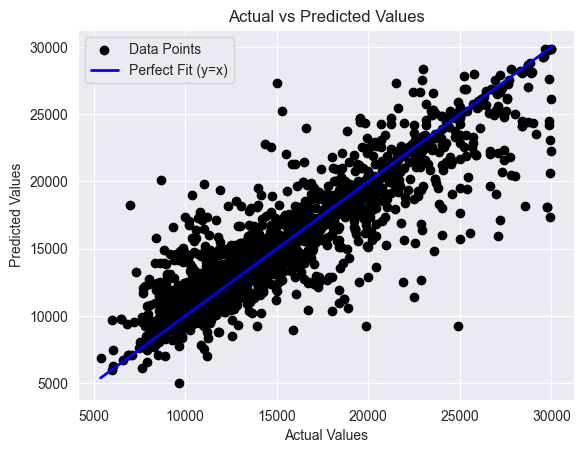

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

model_GB = GradientBoostingRegressor(learning_rate=0.1, max_depth=7, min_samples_split=5, n_estimators=1500, criterion='squared_error')
model_GB.fit(X_train_preprocessed, y_train)
y_pred_GB = model_GB.predict(X_test_preprocessed)
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_GB, color="black", label="Data Points")

# Plot a reference line (y = x) to show perfect predictions
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="blue", linewidth=2, label="Perfect Fit (y=x)")

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [68]:
rmse_GB = root_mean_squared_error(y_test, y_pred_GB)
rmse_GB

np.float64(2148.936375880808)

In [69]:
rmsle_GB = root_mean_squared_log_error(y_test, y_pred_GB)
rmsle_GB

np.float64(0.1422940381360527)

In [92]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
mae_GB = mean_absolute_error(y_test, y_pred_GB)
mae_GB

np.float64(1275.5618671798625)

In [94]:
mape_GB = mean_absolute_percentage_error(y_test, y_pred_GB)
mape_GB

np.float64(0.09004298663786918)

In [71]:
#Random forest parameters
#param_grid = {
#    'n_estimators': [200, 400, 600],
#   'max_depth': [5, 7, 10],
#    'min_samples_split': [2, 5, 10],
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'min_weight_fraction_leaf': [0.0, 0.1, 0.2]
#}
#RF_model = RandomForestRegressor()

In [72]:
#from sklearn.model_selection import GridSearchCV
#grid_search = GridSearchCV(RF_model, param_grid, cv=3)
#grid_search.fit(X_train_preprocessed, y_train)

In [73]:
#print("Best parameters: ", grid_search.best_params_)
#print("Best score: ", grid_search.best_score_)

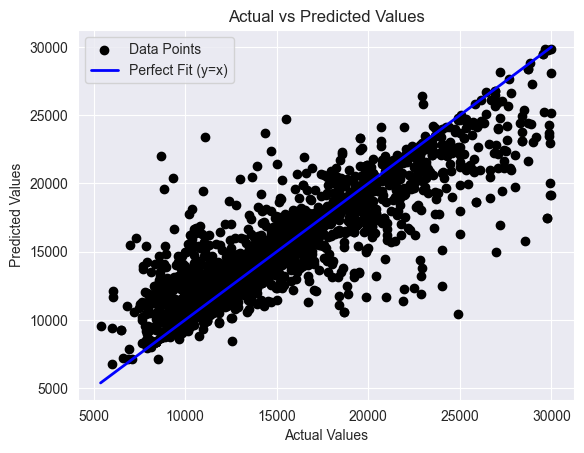

In [74]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(min_samples_split=2, n_estimators=800, max_features='sqrt', min_weight_fraction_leaf=0.0)
RF_model.fit(X_train_preprocessed, y_train)
y_pred_RF = RF_model.predict(X_test_preprocessed)
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_RF, color="black", label="Data Points")
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="blue", linewidth=2, label="Perfect Fit (y=x)")

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [75]:
rmse_RF = root_mean_squared_error(y_test, y_pred_RF)
rmse_RF

np.float64(2349.7292210415817)

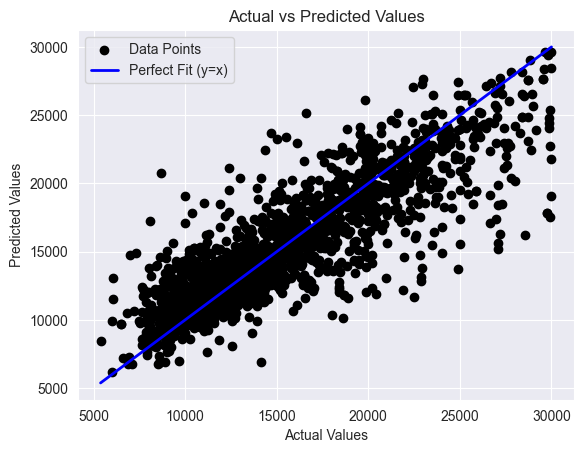

In [76]:
from xgboost import XGBRegressor
model_XGB = XGBRegressor()
model_XGB.fit(X_train_preprocessed, y_train)
y_pred_XGB = model_XGB.predict(X_test_preprocessed)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_XGB, color="black", label="Data Points")
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="blue", linewidth=2, label="Perfect Fit (y=x)")
# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [77]:
rmse_XGB = root_mean_squared_error(y_test, y_pred_XGB)
rmse_XGB

np.float64(2444.4938186546233)

In [78]:
#from sklearn.model_selection import GridSearchCV
#param_grid = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [3, 5, 7],
#    'eta': [0.01, 0.1, 0.3],
#    'subsample': [0.5, 0.7, 1],
#    'colsample_bytree': [0.5, 0.7, 1],
#    'objective': ['reg:squarederror', 'reg:squaredlogerror']
#}
#
#model_XGB = XGBRegressor()

In [79]:
#grid_search = GridSearchCV(model_XGB, param_grid, cv=3)
#grid_search.fit(X_train_preprocessed, y_train)

In [80]:
#print("Best parameters: ", grid_search.best_params_)
#print("Best score: ", grid_search.best_score_)

In [81]:
from xgboost import XGBRegressor
model_XGB = XGBRegressor(eta=0.1, max_depth=7, n_estimators=300, objective='reg:squarederror')
model_XGB.fit(X_train_preprocessed, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [82]:
rmse_XGB = root_mean_squared_error(y_test, y_pred_XGB)
rmse_XGB

np.float64(2444.4938186546233)

In [191]:
# Creating ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

In [192]:
model = Sequential()
model.add(Dense(1000, input_dim=X_train_preprocessed.shape[1], activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

C:\Users\kubak\PycharmProjects\Real_estate_price_forecasting_2\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [193]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import optimizers

optimizer = optimizers.Adam(learning_rate=0.01)

model.compile(loss='mean_squared_error', optimizer=optimizer)
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.keras', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.01)

In [194]:
# Train the model
model.fit(X_train_preprocessed, y_train, epochs=600, batch_size=256, validation_split=0.2, callbacks=[mcp_save, reduce_lr, earlyStopping])

Epoch 1/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 139611200.0000 - val_loss: 35136616.0000 - learning_rate: 0.0100
Epoch 2/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 20967832.0000 - val_loss: 11152076.0000 - learning_rate: 0.0100
Epoch 3/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 12026388.0000 - val_loss: 10824571.0000 - learning_rate: 0.0100
Epoch 4/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 10013539.0000 - val_loss: 9967915.0000 - learning_rate: 0.0100
Epoch 5/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 9426768.0000 - val_loss: 9610943.0000 - learning_rate: 0.0100
Epoch 6/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 8716478.0000 - val_loss: 9607624.0000 - learning_rate: 0.0100
Epoch 7/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 8590299.0000 - val_loss: 10117848.0000 - learning_rate: 0.0100
Epoch 8/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 8191414.5000 - val_loss: 9407392.0000 - learning_rate: 0.0100
Epoch 9/600
28/

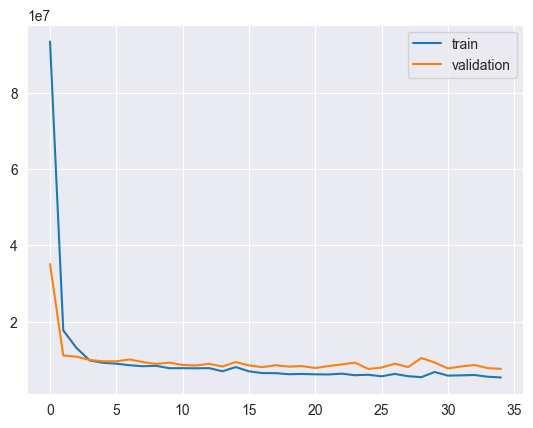

In [195]:
#Accuracy during training
plt.plot(model.history.history['loss'], label='train')
plt.plot(model.history.history['val_loss'], label='validation')
plt.legend()
plt.show()

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


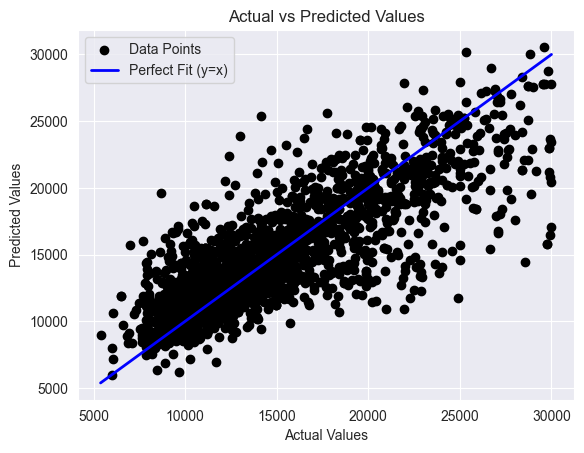

In [196]:
# Predictions
y_pred_ANN = model.predict(X_test_preprocessed)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_ANN, color="black", label="Data Points")
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="blue", linewidth=2, label="Perfect Fit (y=x)")
# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [197]:
rmse_ANN = root_mean_squared_error(y_test, y_pred_ANN)
rmse_ANN

np.float64(2855.3570230388636)

In [198]:
from sklearn.metrics import mean_absolute_error
mae_ANN = mean_absolute_error(y_test, y_pred_ANN)
mae_ANN

np.float64(1996.4017059388984)